# AIPI 590 - XAI | Assignment #1
### Interpretable ML
### Anish Parmar


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/anishParmar9778/DukeXAI/blob/main/HW1/AIPI_590_intepretableML.ipynb)

In [1]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "DukeXAI" # Change to your repo name
git_path = 'https://github.com/anishParmar9778/DukeXAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'HW1'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'DukeXAI'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 163.32 KiB | 1.68 MiB/s, done.
/content/DukeXAI/HW1
WA_Fn-UseC_-Telco-Customer-Churn.csv


## **1. Exploratory Data Analysis**

This section includes an exploratory analysis of the data to understand relationships between different features and the target variable (churn).

The dataset comes from a telecommunications company (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code).

When running my notebook, I would upload the dataset on the side files list in Colab.

**Load Necessary Imports**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_reset, het_breuschpagan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

**Load the churn dataset**

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

This tells us that the dataset contains 21 columns (features) and 7043 entries (data points).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


We see that above that from the raw data, only MonthlyCharges, tenure, and SeniorCitizen are numerical features (rest are categorical).

In [7]:
df = df.drop(['customerID'], axis = 1)

I removed customerID as it is an arbitrary feature assigned to each customer (doesn't provide any meaningful data regarding churn probability).

**Convert 'Yes' to 1 and 'No' to 0 for Churn column in dataset**

I also converted TotalCharges to a numeric value (like Monthly Charges).

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [9]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


**Plot distribution of 'yes' and 'no' (churn and no churn)**

We can see that the dataset has many more 'no' than 'yes' (about 5000 vs. 2000).

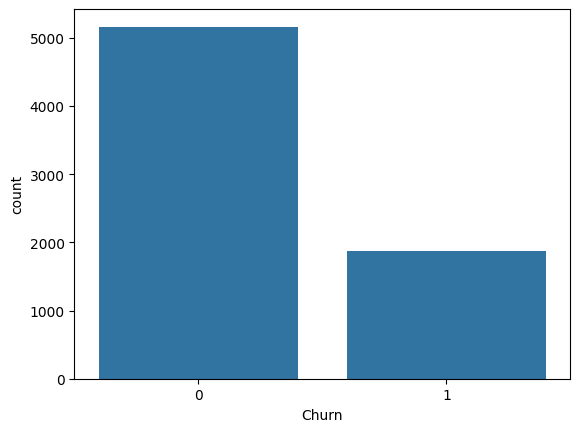

In [10]:
numeric_features = df.select_dtypes(include='number').columns.drop('Churn')
categorical_features = df.select_dtypes(include='object').columns

sns.countplot(x='Churn', data=df)
plt.show()

**Plot distribution of numeric features**

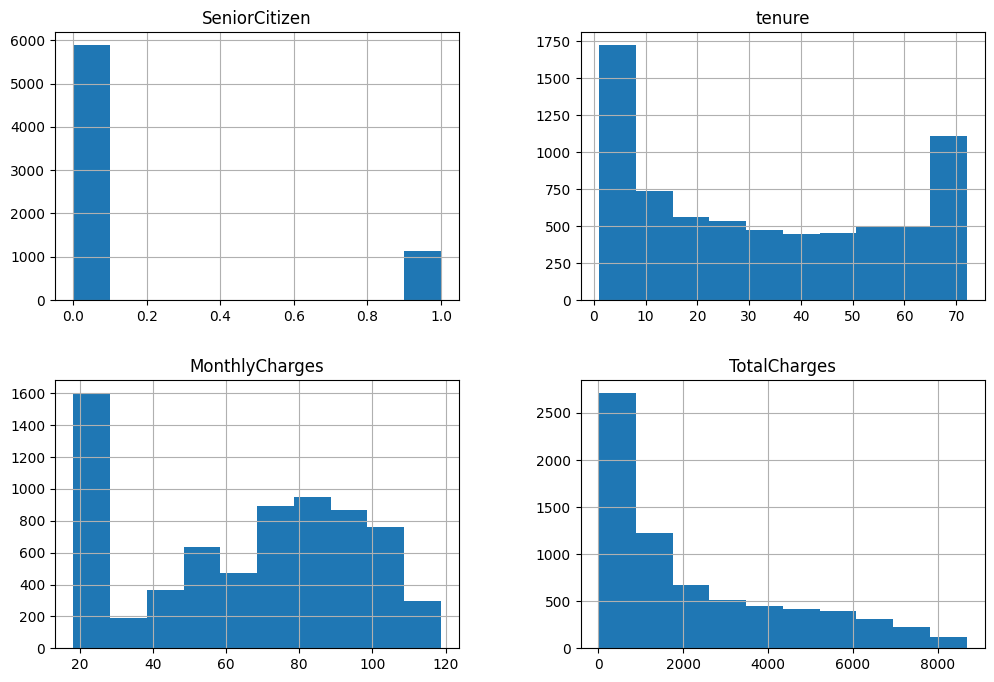

In [11]:
df[numeric_features].hist(figsize=(12,8))
plt.show()

We can observe that majority of the dataset entries appear to not be senior citizens. Total charges appears to be a downward curve while tenure is U-shaped. Monthly charges is mostly concentrated close to 20 but is somewhat distributed till 120.

***Multicollinearity***

Below a correlation matrix and VIF matrix were constructed to check for multicollinearity.

Below I have one-hot encoded all categorical features. I also produced a correlation matrix to observe relationships between the numeric features.

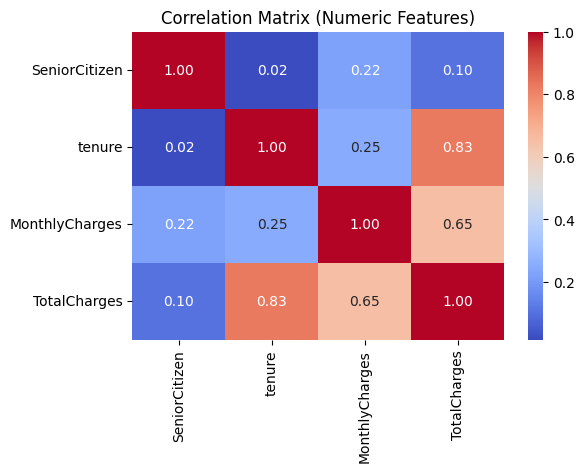

In [12]:
# one-hot encode categorical features so that they can be used in the models
X_cat = pd.get_dummies(df[categorical_features], drop_first=True, dtype=int)
X_num = df[numeric_features]

X_all = pd.concat([X_num, X_cat], axis=1)

# ensure all features are numeric
X_all = X_all.apply(pd.to_numeric, errors='coerce')
X_all = X_all.select_dtypes(include=[np.number])

y = df['Churn']

# numeric features only in correlation matrix
corr_numeric = X_num.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_numeric, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

This correlation matrix above visualizes the relationships between numerical features. The diagonal elements (represent the correlation of a variable with itself) are all 1.00 (as expected). A very strong positive correlation of 0.83 exists between tenure (the length of time a customer has been with a company - assumed to be in years) and TotalCharges. This indicates that the longer a customer stays, the higher their total charges are likely to be. The 0.83 correlation between tenure and TotalCharges is a strong indicator of multicollinearity, which is a significant problem if both variables are used as predictors in a regression model. This high correlation suggests that the two variables provide redundant information, making it difficult for the model to isolate the unique effect of each on a dependent variable. In future practice, it may be a good idea to remove one of the two variables.

*I did remove TotalCharges and my models performed roughly the same as with it included.

A moderately strong positive correlation of 0.65 is also present between MonthlyCharges and TotalCharges, suggesting that customers with higher monthly bills tend to have higher total charges (this makes sense). Conversely, the correlation between SeniorCitizen and all other variables is very weak (0.02 with tenure and 0.10 with TotalCharges). This suggests that being a senior citizen has little to no linear relationship with a customer's tenure, monthly charges, or total charges. The matrix appears to suggest that tenure and monthly charges are the key factors in determining total charges.

In [13]:
print(X_cat.head())
print(X_cat.columns)

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            0            1               0                 0   
1            1            0               0                 1   
2            1            0               0                 1   
3            1            0               0                 0   
4            0            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0                  0   
3                               1                  0   
4                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4 

We can see from the output above that one-hot encoding was performed successfully on all categorical features.

**Variance Inflation Factor (VIF)**

In [14]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
print("VIF for Numeric Features:\n", vif_data)

VIF for Numeric Features:
           Feature       VIF
0   SeniorCitizen  1.257569
1          tenure  6.332737
2  MonthlyCharges  3.701617
3    TotalCharges  8.085198


This shows the degree of multicollinearity amongst the numeric predictors. Most of the features have reasonable VIFs but Total Charges (8) and tenure (6.3) are relatively high. This suggests that they may be moderately correlated with other predictors and could affect the stability of coefficient estimations.

***Linearity (Partial Analysis)***

The reset test for linearity was conducted below. The residual plot for each model is found in each model section of the notebook.

**RESET test (Regression Equation Specification Error Test)**

In [15]:
y = df['Churn']
X_const = sm.add_constant(X_all)
lm = sm.OLS(y, X_const).fit()
linear_reset(lm, power=2, use_f=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=206.05548148419922, p=4.4673053541154595e-46, df_denom=7.01e+03, df_num=1>

This RESET test produced an F test value of 206 and a p value near 0. This suggests a linear regression model may suffer from non-linearity. A small p value suggests adding additional terms beyond the original linear combination of predictors would improve the model. The relationship between predictors and the response is likely not completely linear. We would either need to transform variables or look at models that do not assume linearity.

***Homoscedasticity (Partial)***

The Breusch-Pagan test for homoscedasticity was conducted below. The plots for residuals vs predicted values for each model is found in each model section of the notebook.

**Breusch-Pagan test**

In [16]:
bp_test = het_breuschpagan(lm.resid, lm.model.exog)

labels = ['Lagrange multiplier stat', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier stat': np.float64(1370.4798293514407), 'p-value': np.float64(1.4942610719778871e-269), 'f-value': np.float64(73.75744196060933), 'f p-value': np.float64(6.474624204827289e-308)}


The bp test produced p-values very close to 0. This suggests the model suffers from heteroscedascity (variance of residuals is not constant across range of predictors). This suggests that linear regression would not be the best model for this case.

***No Influential Outliers***

**Cook's Distance**

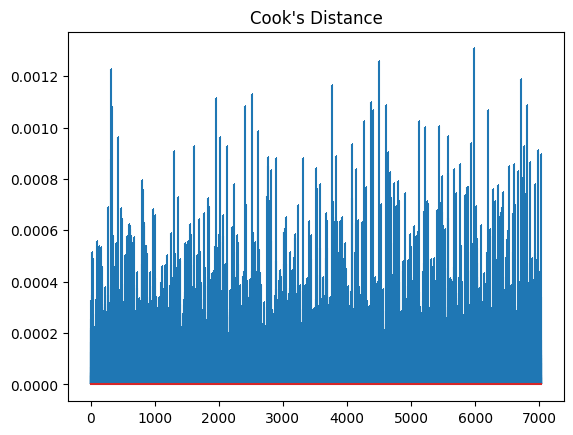

In [17]:
influence = lm.get_influence()
cooks_d = influence.cooks_distance[0]
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.show()

This plot for the Cook's distance has a highest value of around 0.0012. This suggests that there are not many (if any) significant outliers in the data.

**Visualizing Categorical (One-Hot Encoded) Features Distribution**

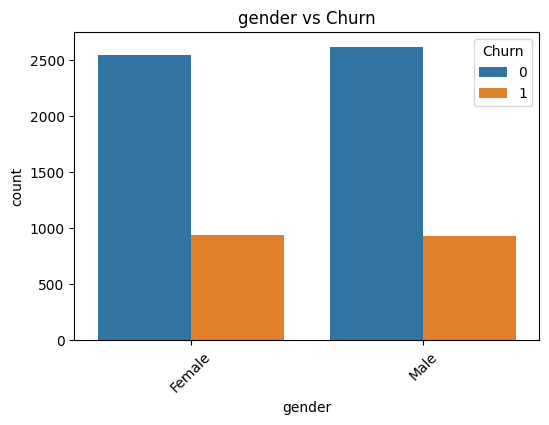

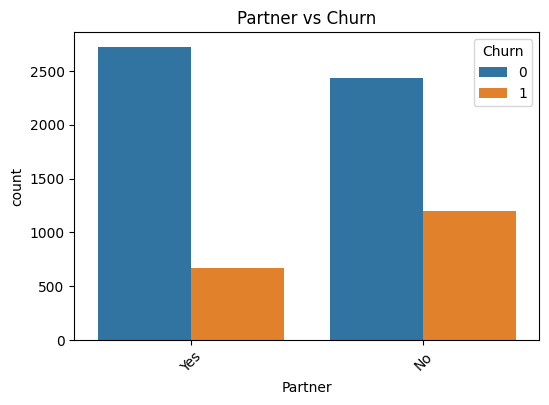

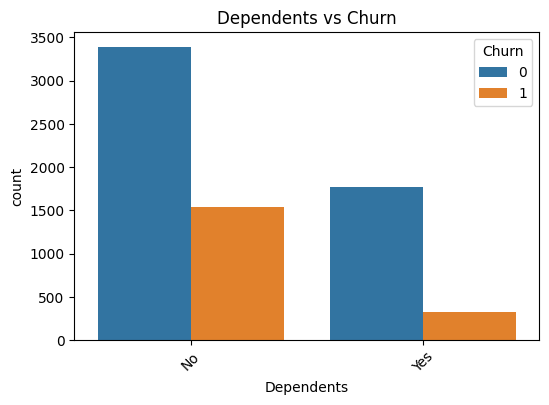

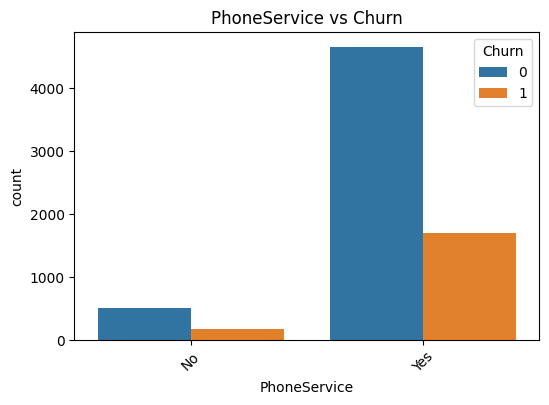

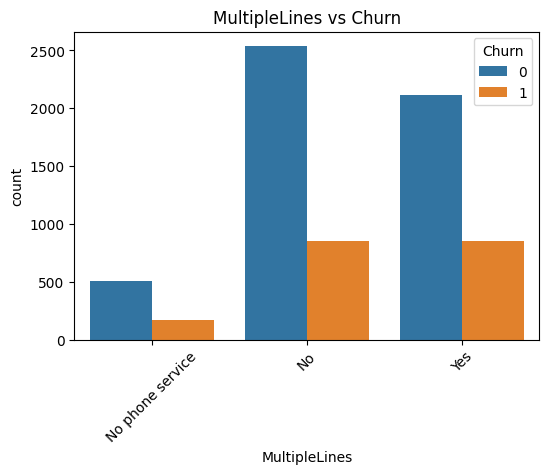

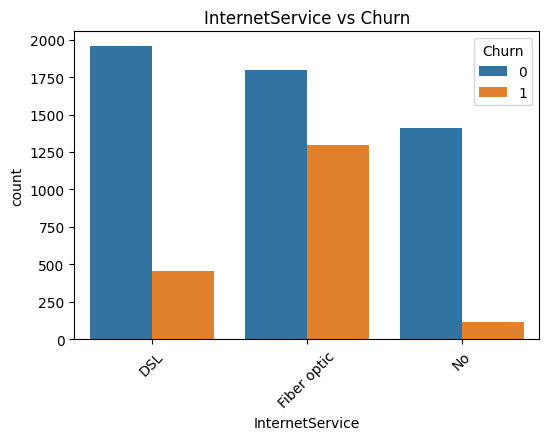

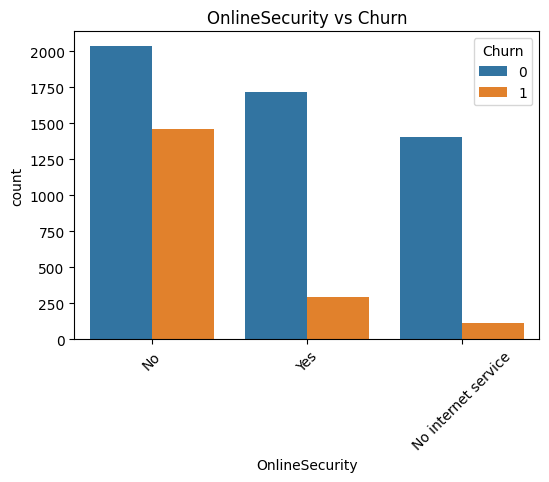

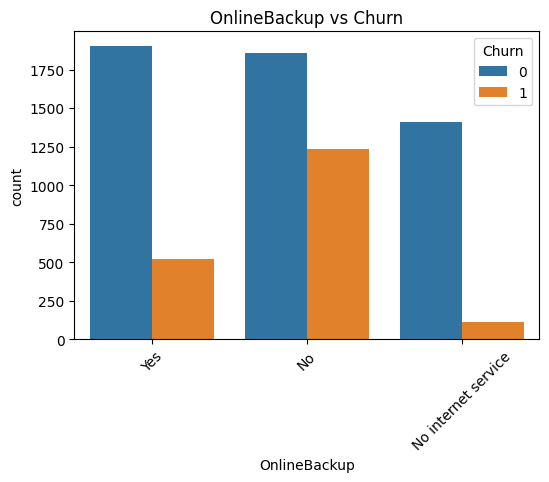

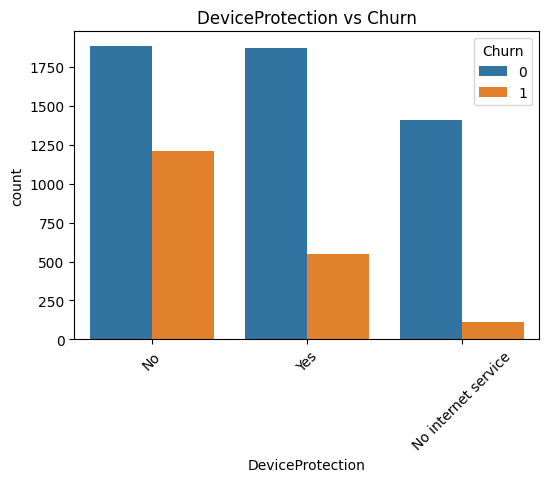

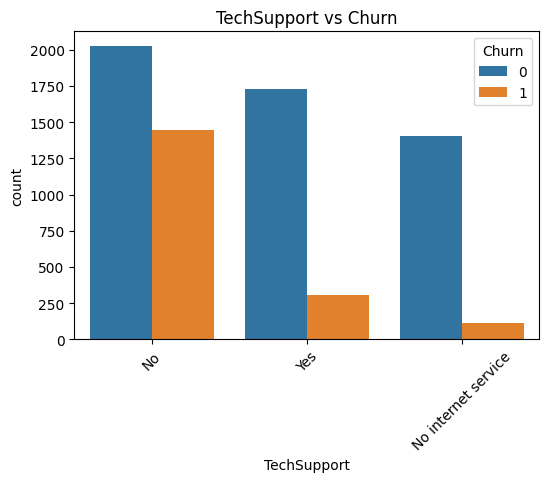

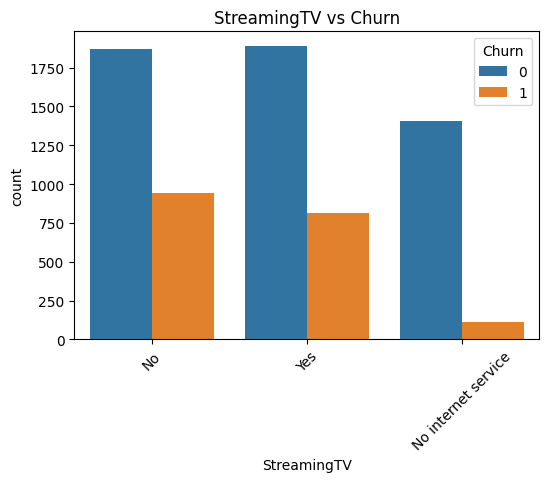

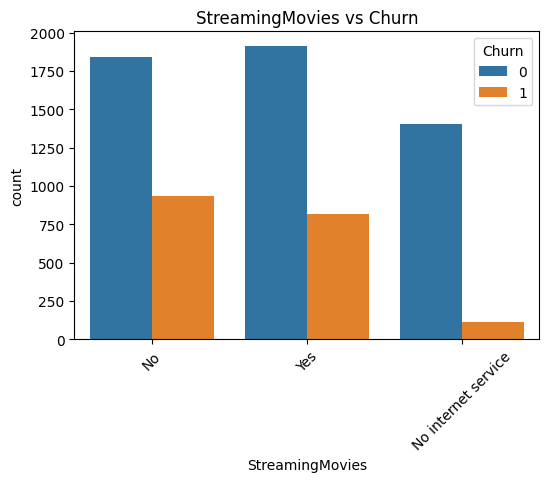

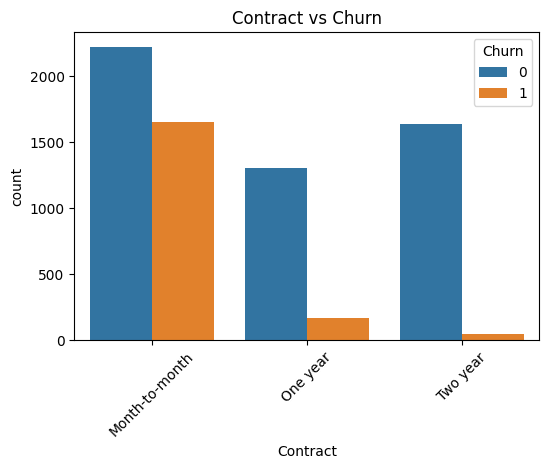

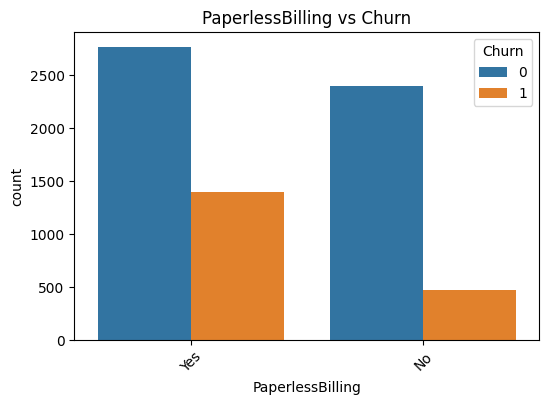

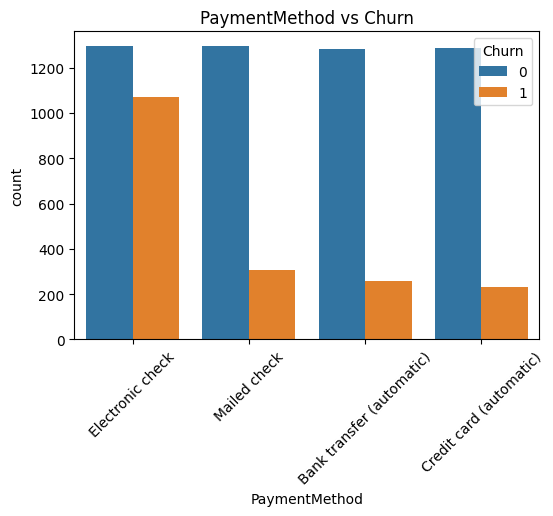

In [18]:
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

These plots provide us with some additional insight into the distribution of the different types for each categorial feature between churned and not churned.

We can see that across all features, the data is heavily skewed towards no churn (0). This is something we also saw at the start of EDA with 5000 0 entries for churn.

## **2. Linear Regression**

**Linear Regression model that treats the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning).**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression (sklearn) -> MSE: {mse:.4f}, R2: {r2:.4f}")

coefficients = pd.DataFrame({'Feature': X_all.columns, 'Coefficient': lr.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

Linear Regression (sklearn) -> MSE: 0.1459, R2: 0.2522
                                  Feature  Coefficient
10            InternetService_Fiber optic     0.135763
23                    StreamingMovies_Yes     0.046491
21                        StreamingTV_Yes     0.044851
9                       MultipleLines_Yes     0.033792
28         PaymentMethod_Electronic check     0.029472
0                           SeniorCitizen     0.020068
26                   PaperlessBilling_Yes     0.017664
17                   DeviceProtection_Yes     0.010222
7                        PhoneService_Yes     0.006340
15                       OnlineBackup_Yes     0.003603
5                             Partner_Yes     0.003522
4                             gender_Male    -0.001845
29             PaymentMethod_Mailed check    -0.002677
27  PaymentMethod_Credit card (automatic)    -0.003930
8          MultipleLines_No phone service    -0.006340
6                          Dependents_Yes    -0.013029
14       O

**Interpreting Coefficients & Performance**

This linear regression model has an MSE of 0.1459 and an R² of 0.2522 (it explains only about 25% of the variance in the response) so its predictive performance is modest. Features like InternetService_Fiber optic, StreamingMovies_Yes, and StreamingTV_Yes have the largest positive effects, meaning they increase the predicted outcome when present (positively correlated with churn outcome). On the other hand, MonthlyCharges, TotalCharges, and short-term contracts have the largest negative coefficients, indicating they decrease the predicted outcome. Most of the other features have relatively small coefficients, which suggests a minor impact on the model's predictions. Overall, the model highlights some key service-related drivers but likely misses nonlinear interactions or complex effects, which might be captured better by logistic or GAM models.

***Linearity & Homoscedasticity (Partial)***

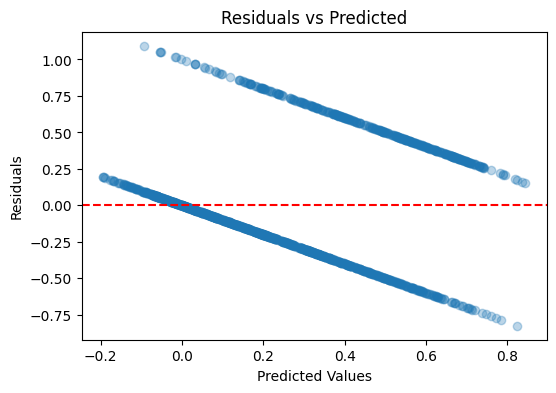

In [20]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

The "Residuals vs Predicted" plot can be used to assess a regression model's quality. Ideally, residuals should be randomly scattered around the zero line. However the plot above shows a two distinct diagonal lines. This indicates that the linear model is a very poor fit for the data. The non-random pattern is a severe violation of the assumption of linearity and suggests that the linear model is inappropriate for the underlying relationships in the dataset.

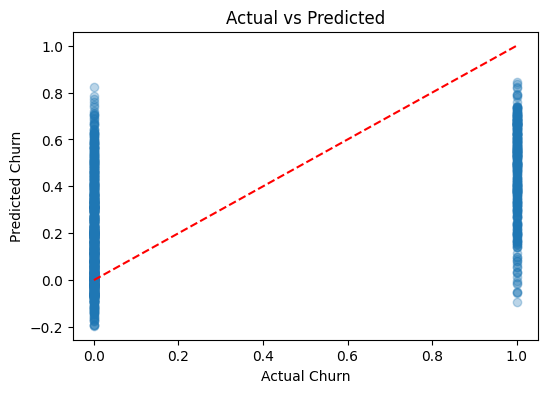

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0,1], [0,1], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn")
plt.title("Actual vs Predicted")
plt.show()

In the above plot we can see that the data points are not distributed along the red dashed line, which represents where actual values perfectly match predicted values. Instead, the points are in two distinct vertical lines, one at the Actual Churn = 0 mark and another at the Actual Churn = 1 mark. This plot is what we might see with a classification model (like logistic regression) where the model is predicting the probability of an event (churn), which is then being rounded to either 0 or 1. This plot suggests the model's predictions are not perfectly aligned with the actual outcomes and the model is not performing well in predicting the probability of churn across the full range of values. I think we should expect to see improvement with the logistic regression model.

***Normality of Residuals***

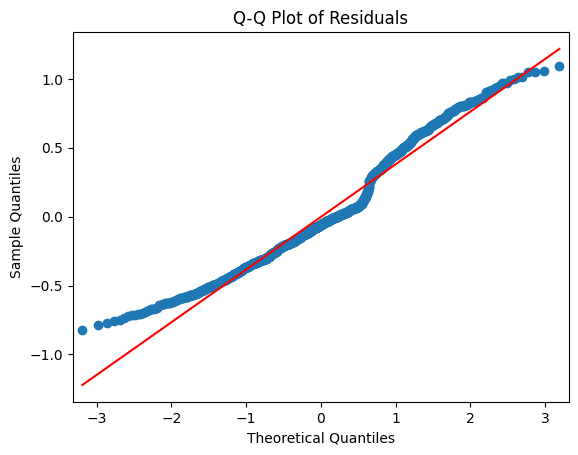

Shapiro-Wilk test p-value: 1.9750837356229524e-18


In [22]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()
print("Shapiro-Wilk test p-value:", stats.shapiro(residuals).pvalue)

Ideally, we want the points on the Q-Q plot to fall along the diagonal line. However the plot above shows points curving away from the line at the tails (close to an S-shape), indicating that the residuals are not normally distributed. The Shapiro-Wilk test p-value is very small, suggesting that the residuals are not normally distributed. This seems to violate a key assumption of linear regression models.

***Independence of Observations***

**Durbin-Watson Test**

In [23]:
print("Durbin-Watson:", durbin_watson(residuals))

Durbin-Watson: 2.001482098111009


This is very close to 2 which suggests there is little to no autocorrelation in the residuals. This implies the assumption of independence of observations is reasonably satisfied for this linear regression model.

**Heatmap of Top 10 Features (By Importance)**

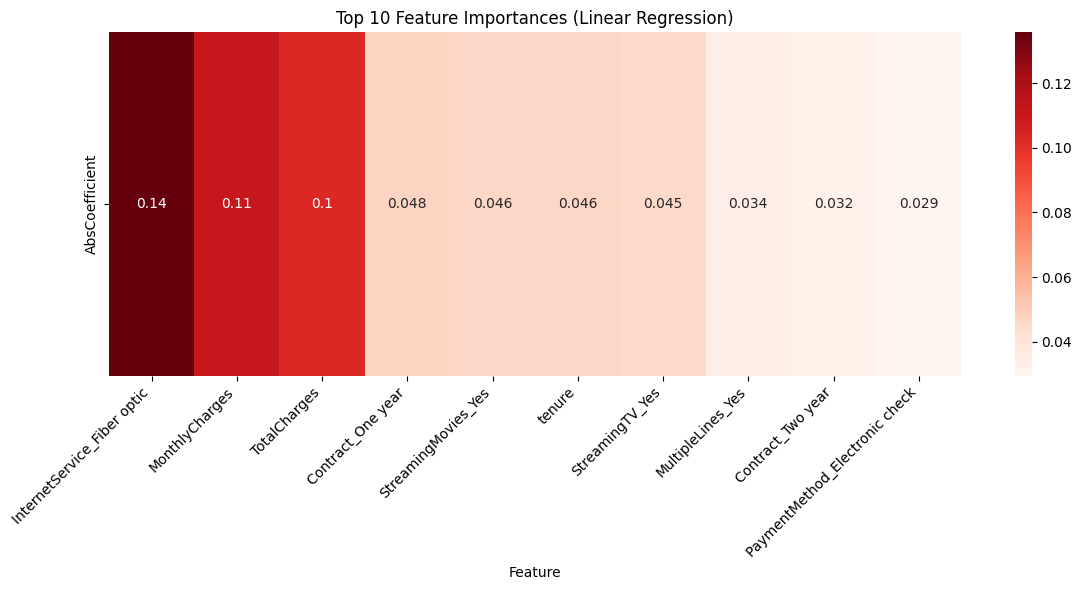

In [24]:
coeff_abs = np.abs(lr.coef_)
coeff_df = pd.DataFrame({'Feature': X_all.columns, 'AbsCoefficient': coeff_abs})

# sort and take top 10
coeff_top10 = coeff_df.sort_values(by='AbsCoefficient', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.heatmap(
    coeff_top10.set_index('Feature').T,
    annot=True,
    cmap='Reds',
    annot_kws={"size": 10}
)
plt.title("Top 10 Feature Importances (Linear Regression)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Features with higher absolute coefficient values contribute more strongly to the model's predictions, showing that internet service fiber optic, monthly charges and total charges are the most influential factors in determining whether a customer has been churned. SeniorCitizen appears to be the least important out of the 4 numerical features.

## **3. Logistic Regression**

**Logistic Regression model that treats churn as a binary variable.**

**Load necessary imports**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

**Split the data into train & test**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Create a Logistic Regression Model and evaluate accuracy & ROC AUC**

In [27]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

y_pred = logreg.predict(X_test_scaled)

In [28]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.7868
Confusion Matrix:
 [[914 119]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC: 0.8319


True Negatives (not churning classified correctly): 914

False Positives (not churning classified incorrectly): 119

False Negatives (churning classified incorrectly): 181

True Positives (churning classified correctly): 193

The model classifies not churning much better than churning (makes sense due to imbalance of data in dataset).

The model predicts non-churning customers (class 0) better than churning ones (class 1), with relatively high precision and recall for class 0. Overall accuracy is 79%, but the recall and F1-score for class 1 show it struggles with correctly identifying customers who will churn.

***Linearity & Homoscedasticity (Partial)***

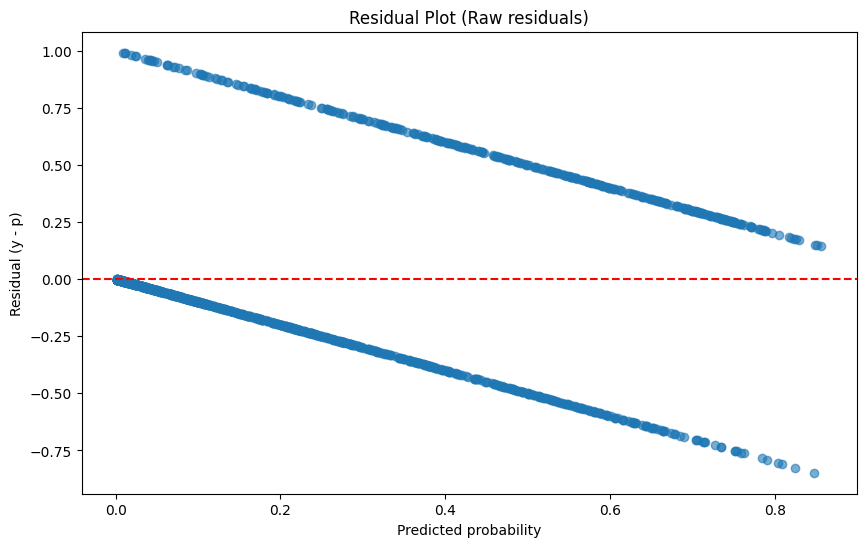

In [29]:
residuals = y_test - y_pred_proba

plt.figure(figsize=(10,6))
plt.scatter(y_pred_proba, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted probability")
plt.ylabel("Residual (y - p)")
plt.title("Residual Plot (Raw residuals)")
plt.show()

The "Residuals vs Predicted" plot can be used to assess a regression model's quality. Ideally, residuals should be randomly scattered around the zero line. However the plot above shows a two distinct diagonal lines. This indicates that the linear model is a very poor fit for the data. The non-random pattern is a severe violation of the assumption of linearity (similar to the linear regression model).

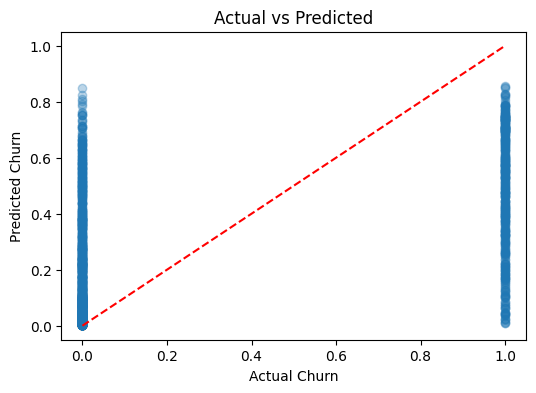

In [30]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_proba, alpha=0.3)
plt.plot([0,1], [0,1], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn")
plt.title("Actual vs Predicted")
plt.show()

In the above plot we can see that the data points are not distributed along the red dashed line, which represents where actual values perfectly match predicted values. Instead, the points are in two distinct vertical lines, one at the Actual Churn = 0 mark and another at the Actual Churn = 1 mark. This plot suggests the model's predictions are not perfectly aligned with the actual outcomes and the model is not performing well in predicting the probability of churn across the full range of values (similar to linear regression model).

***Normality of Residuals***

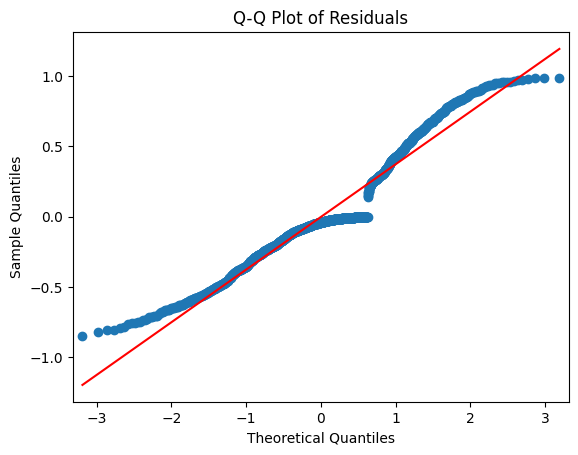

Shapiro-Wilk test p-value: 2.7334325906431357e-22


In [31]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()
print("Shapiro-Wilk test p-value:", stats.shapiro(residuals).pvalue)

Ideally, we want the points on the Q-Q plot to fall along the diagonal line. However the plot above shows points curving away from the line at the tails (close to an S-shape), indicating that the residuals are not normally distributed. The Shapiro-Wilk test p-value is very small, suggesting that the residuals are not normally distributed (similar to the linear regression model earlier).

***Independence of Observations***

**Durbin Watson Test**

In [32]:
print("Durbin-Watson:", durbin_watson(residuals))

Durbin-Watson: 1.9828060820807099


This is very close to 2 which suggests there is little to no autocorrelation in the residuals. This implies the assumption of independence of observations is reasonably satisfied.

In [33]:
coeff_df = pd.DataFrame({
    'Feature': X_all.columns,
    'Coefficient': logreg.coef_[0]
})
coeff_df['OddsRatio'] = np.exp(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='OddsRatio', ascending=False)
print(coeff_df)

                                  Feature  Coefficient  OddsRatio
3                            TotalCharges     0.681069   1.975990
10            InternetService_Fiber optic     0.653546   1.922346
23                    StreamingMovies_Yes     0.223898   1.250943
21                        StreamingTV_Yes     0.214317   1.239016
9                       MultipleLines_Yes     0.161699   1.175507
26                   PaperlessBilling_Yes     0.134289   1.143723
28         PaymentMethod_Electronic check     0.123589   1.131551
0                           SeniorCitizen     0.094952   1.099606
17                   DeviceProtection_Yes     0.040735   1.041576
8          MultipleLines_No phone service     0.028882   1.029303
5                             Partner_Yes     0.024882   1.025194
15                       OnlineBackup_Yes    -0.008155   0.991878
4                             gender_Male    -0.015787   0.984337
29             PaymentMethod_Mailed check    -0.026910   0.973449
7         

Each coefficient represents the log-odds change in the probability of churn for a one-unit increase in the feature, holding other features constant. Positive coefficients (TotalCharges, InternetService_Fiber optic, etc.) indicate higher odds of churn, while negative coefficients (tenure, MonthlyCharges, etc.) indicate lower odds. The OddsRatio column translates these log-odds into multiplicative effects on the odds. For example, an odds ratio of 1.975 for TotalCharges means that for each unit increase in total charges, the odds of churn nearly double. Features with odds ratios close to 1 have minimal impact, whereas features further from 1, like tenure at 0.239, have stronger predictive effects.

Customers with longer tenure and lower monthly charges are much less likely to churn, while those with higher total charges or using fiber optic internet are more likely to leave. Multi-year contracts also strongly reduce churn, whereas short-term or electronic payment methods slightly increase the likelihood of leaving.



## **4. Generalized Additive Model (GAM)**

**Generalized Additive Model (GAM) where non-linear relationships between customer features and churn are modeled.**

Needed to install pygam

In [34]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.6 MB/s eta 0:00:00


Load necessary imports

In [35]:
from pygam import LogisticGAM, s, f

Split data and create gam with first 4 smoothed features as numerical and remaining terms are the categorical (one-hot encoded) features.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

terms = s(0) + s(1) + s(2) + s(3)

for j in range(4, X_all.shape[1]):
    terms += f(j)

gam = LogisticGAM(terms).fit(X_train_scaled, y_train)

y_pred = gam.predict(X_test_scaled)
y_pred_proba = gam.predict_proba(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7982
ROC AUC: 0.8385
Confusion Matrix:
 [[933 100]
 [184 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



This is a higher accuracy and auc score than the logistic regression model.

True Negatives (not churning classified correctly): 933

False Positives (not churning classified incorrectly): 100

False Negatives (churning classified incorrectly): 184

True Positives (churning classified correctly): 190

The model classifies not churning much better than churning just like the logistic regression model (makes sense due to imbalance of data in dataset).

The model predicts non-churning customers (class 0) much more accurately than churning customers (class 1), with higher precision and recall for class 0. Overall accuracy is 80%, but the lower recall and F1-score for class 1 indicate it struggles to correctly identify customers who will churn.

Both models (logistic regression & logistic GAM) perform similarly, predicting non-churners (class 0) much more accurately than churners (class 1). The logistic GAM slightly improves recall and F1 for churners and achieves a marginally higher overall accuracy (80% vs. 79%), suggesting it captures some non-linear effects that the standard logistic regression misses.

**Partial Dependence Plots**

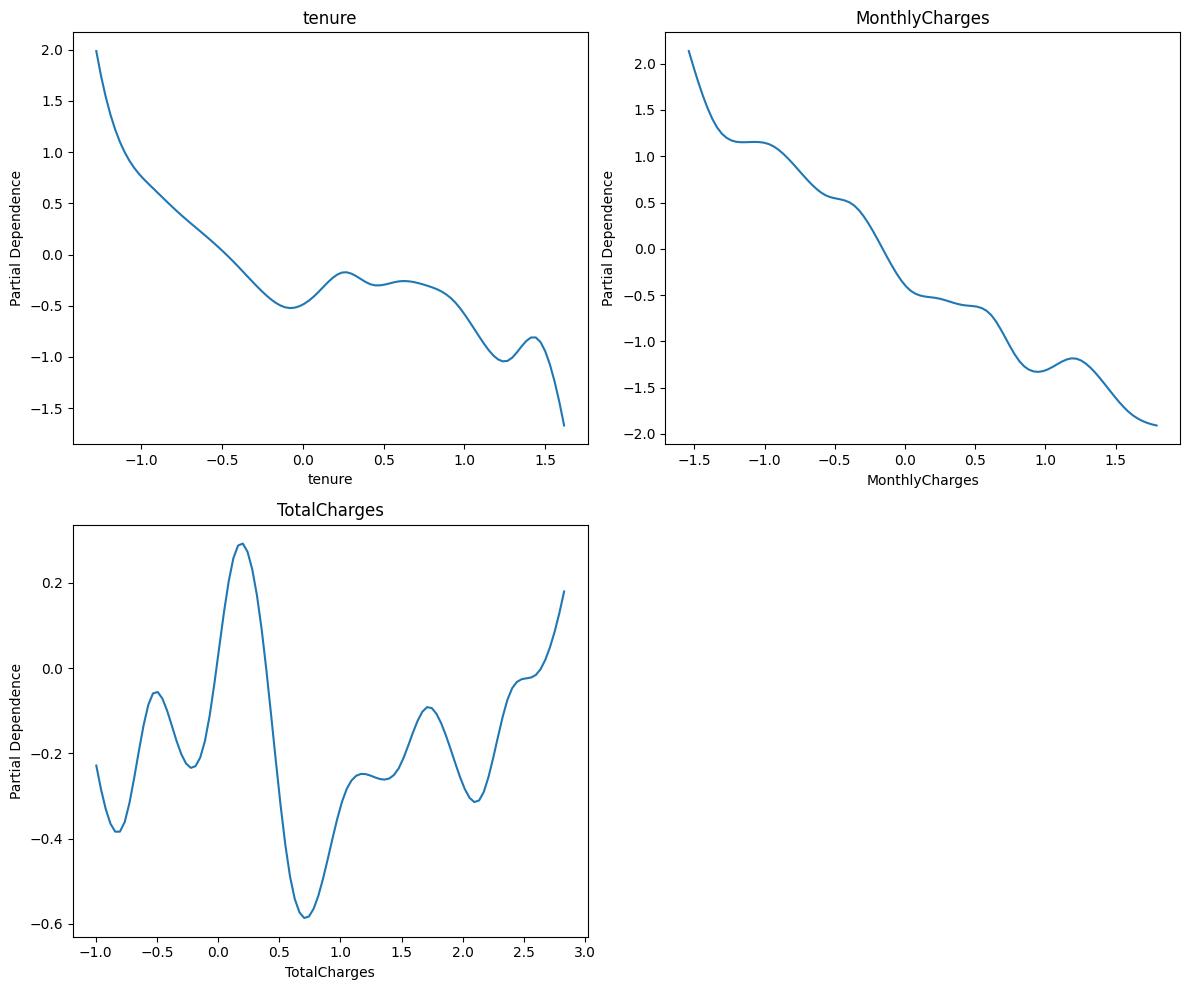

/tmp/ipython-input-1184889805.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Effect", y="Feature", data=effects_df, palette="coolwarm")


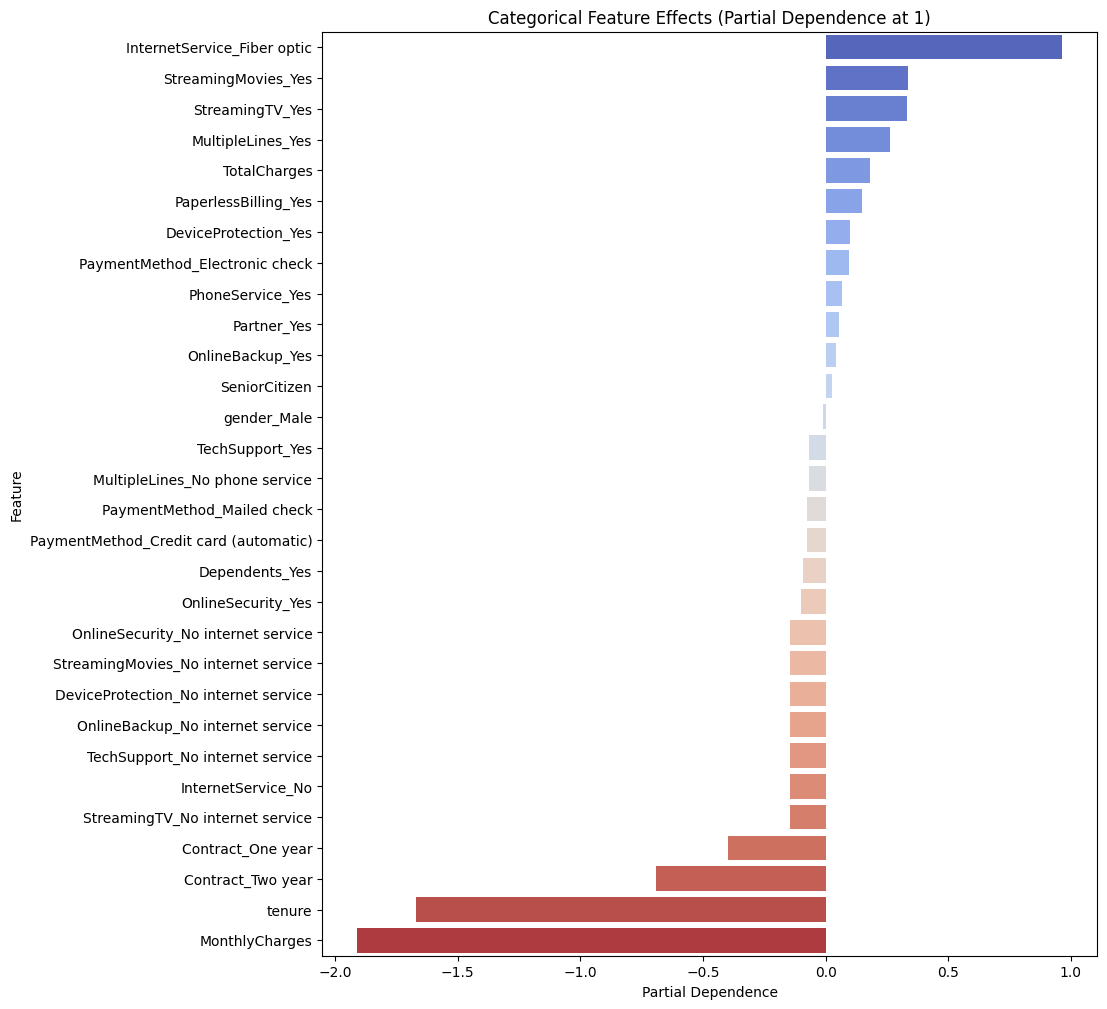

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# separate numerical and categorical features/terms

# s(1) to s(3)
num_terms = list(range(1, 4))

# all one-hot encoded categorical features and seniorcitizen (essentially one-hot encoded since it's only 0 or 1)
cat_terms = list(range(0, X_all.shape[1]))

# plot the numerical features
n_num = len(num_terms)
n_cols = 2
n_rows = int(np.ceil(n_num / n_cols))

plt.figure(figsize=(12, 5 * n_rows))

for idx, i in enumerate(num_terms, start=1):
    plt.subplot(n_rows, n_cols, idx)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(X_all.columns[i])
    plt.xlabel(X_all.columns[i])
    plt.ylabel("Partial Dependence")

plt.tight_layout()
plt.show()

# plot categorical feature effects as bars for easy comparison
cat_effects = []
cat_names = []

for i in cat_terms:
    XX = gam.generate_X_grid(term=i)
    pd_vals = gam.partial_dependence(term=i, X=XX)
    # effect when the category is "on"
    effect = pd_vals[-1]
    cat_effects.append(effect)
    cat_names.append(X_all.columns[i])

effects_df = pd.DataFrame({
    "Feature": cat_names,
    "Effect": cat_effects
}).sort_values("Effect", ascending=False)

plt.figure(figsize=(10, len(cat_names) * 0.4))
sns.barplot(x="Effect", y="Feature", data=effects_df, palette="coolwarm")
plt.title("Categorical Feature Effects (Partial Dependence at 1)")
plt.xlabel("Partial Dependence")
plt.ylabel("Feature")
plt.show()


Above we can see the partial dependence plots for the 3 primary numerical features and the remaining categorical (one-hot encoded) features.

Tenure has a negative, downward slope which suggests that customers that have been with the company longer are less likely to leave (be churned).

Monthly Charges has a mostly negative slope, suggesting that customers with higher monthly charges are more likely to be churned.

Total Charges has a mostly positive slope, suggesting that customers with higher total bills are more likely to be churned. However, here also there is a slight dip near the middle.

Above we can see the specific categorical features that increased and decreased the probabilities for churning. Contract Two Year was the highest to decrease and internet service fiber optic was highest to increase.

**GAM Summary**

In [38]:
print(gam.summary())

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     55.9175
Link Function:                        LogitLink Log Likelihood:                                 -2239.2277
Number of Samples:                         5625 AIC:                                             4590.2904
                                                AICc:                                            4591.4747
                                                UBRE:                                                2.824
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3125
Feature Function                  Lam

/tmp/ipython-input-3564666153.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


The GAM summary shows that all numeric features have significant effects on churn, with different degrees of non-linearity captured by the spline terms. An R-squared value of 0.3125 indicates the model explains more variation in churn than a simple linear regression (0.25), while the effective degrees of freedom reveal which features have stronger non-linear relationships. The GAM provides a flexible way to understand how each feature impacts churn probability beyond linear effects.

# 5. **Model Comparison**

I explored 3 models: linear regression, logistic regression, and logistic generalized additive model (GAM).

Linear regression was more of a baseline data exploratory tool. Its pros are that it's simple to understand/use and its coefficients are relatively easy to interpret. Some cons are that several assumptions required for linear regression are not directly met with this dataset and it is not suitable to model cases of binary outcomes (like churn). It did provide some insight into the direction of feature effects, but it is not well-suited for binary outcomes. It had an MSE 0.1459 and an R² of 0.2522 (it explains only about 25% of the variance in the response) so its predictive performance is modest at best.

Logistic Regression is the more often used approach for binary classification and produced a better fit to the data (pro). It had an accuracy around 78.68% and a ROC AUC around 0.8319. This indicates a good overall selection between churn and no churn (yes and no). However some cons are that assumptions are still not met with logistic regression and some relationships are still not fully represented.

The logistic GAM outperformed both of the linear and logistic regression models (pro). By using smooth terms for numeric predictors, it could capture nonlinear relationships that logistic regression did not. The model the highest performance with an accuracy of 79.82% and a ROC AUC of 0.8385. The accuracy and AUC score are higher than that of the logistic regression model. The classification report results (precision, recall) suggested that the GAM captured some non-linear effects that the logistic regression model may have missed. The GAM also maintained interpretability through smooth effect plots, which lets the company understand whether features matter and how they influence churn probability. The only possible con would be that with a combination of so many terms, it could be somewhat difficult for a user to interpret/understand.

# 6. **Model Recommendation**

Based on the results of the 3 models, the logistic GAM appears to have the best balance of performance and interpretability. It should be the preferred model for the telecommunications company to identify customers at risk of churn. The logistic regression model can act as a simpler baseline, while I would not recommend linear regression beyond initial data exploratory analysis.